## Fetching Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
features, labels = mnist['data'], mnist['target']

now here we have separated the features and labels of the mnist dataset. The mnist['data'] is an array of 70,000 elements each of which has 784 pixels which when arranged in a 28x28 gridLayout, will give an image of a handwritten digit. The mnist['target'] is an array of 70,000 elements representing the respective digits made by the features.

## Ploting an instance of mnist dataset

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
some_digit = features.loc[36001] #getting the 36,001 st feature having 784 linear pixels

import numpy as np
some_digit_values = some_digit.values

some_digit_image = some_digit_values.reshape(28,28) #reshaping the selected 784 linear pixels into 28x28 grid

Here we have seen that some_digit is a pandas' series object. But Series objects don't have a reshape() method. Thus we have converted it to numpy array using the values attribute and then used the reshape() method on this numpy array.

(-0.5, 27.5, 27.5, -0.5)

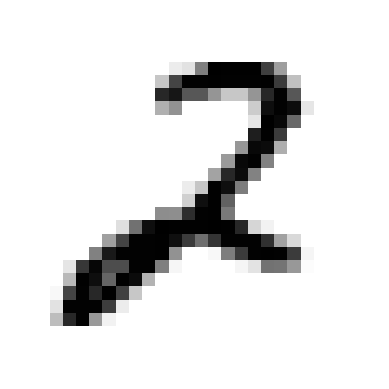

In [6]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [7]:
labels[36001]

'2'

## Splitting Training and Testing data

In [8]:
#slicing
train_features = features[:60000]
test_features = features[60000:]

train_labels = labels[:60000]
test_labels = labels[60000:] 

now there is the need of shuffling the data

In [9]:
import numpy as np
shuffle_index = np.random.permutation(60000) # this gives an array of random numbers from 0 to 60,000

train_features = train_features.iloc[shuffle_index]
train_labels = train_labels.iloc[shuffle_index]

## Creating a 2 detector

In [10]:
#converting all the label data from string to int
train_labels = train_labels.astype(np.int8)
test_labels = test_labels.astype(np.int8)

#converting both train_labels and test_labels to boolean after checking for the occurrance ofthe digit 2.
train_labels_bool = train_labels == 2
test_labels_bool = test_labels == 2 

## Sci-Kit Learn Design

Now we will train a logistic regresion model as a binary classifier

In [11]:
from sklearn.linear_model import LogisticRegression as LR 
binary_clf_model = LR()

binary_clf_model.fit(train_features, train_labels_bool) # Training the model

c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction

In [12]:
binary_clf_model.predict([some_digit])

c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

## Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score as cvs

a = cvs(binary_clf_model, train_features, train_labels_bool, cv=3, scoring="accuracy")

c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

In [14]:
print(a)
print(a.mean())

[0.97885 0.978   0.97705]
0.9779666666666667


Thus, we see that our model has achieved an accuracy of 97.81%

In [15]:
from sklearn.model_selection import cross_val_predict as cvp

train_labels_predicted = cvp(binary_clf_model, train_features, train_labels_bool, cv=3)
train_labels_predicted

c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

array([False, False, False, ..., False, False, False])

## Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix as cm

cm(train_labels_bool, train_labels_predicted)

array([[53549,   493],
       [  829,  5129]], dtype=int64)

For ideal case:

In [17]:
cm(train_labels_bool, train_labels_bool)

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision

In [18]:
from sklearn.metrics import precision_score as ps

ps(train_labels_bool, train_labels_predicted)

0.9123087869085734

## Recall

In [19]:
from sklearn.metrics import recall_score as rs

rs(train_labels_bool, train_labels_predicted)

0.8608593487747567

## F1-Score

In [20]:
from sklearn.metrics import f1_score as fs

fs(train_labels_bool, train_labels_predicted)

0.8858376511226254

## Precision Recall Curve

In [21]:
from sklearn.metrics import precision_recall_curve as prc

label_scores = cvp(binary_clf_model, train_features, train_labels_bool, cv=3, method="decision_function")

precisions, recalls, thresholds = prc(train_labels_bool, label_scores)


c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

[0.0993     0.09930166 0.09930331 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.35683115e-04
 1.67841558e-04 0.00000000e+00]
[-44.74851761 -44.54461002 -44.51685773 ...  17.96862024  19.91593534
  21.16316405]


c:\Users\prath\Desktop\Coding\Machine Learning with PYTHON\learning_ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print(precisions)
print()
print(recalls)
print()
print(thresholds)

[0.0993     0.09930166 0.09930331 ... 1.         1.         1.        ]

[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.35683115e-04
 1.67841558e-04 0.00000000e+00]

[-44.74851761 -44.54461002 -44.51685773 ...  17.96862024  19.91593534
  21.16316405]


## Ploting P.R.Curve

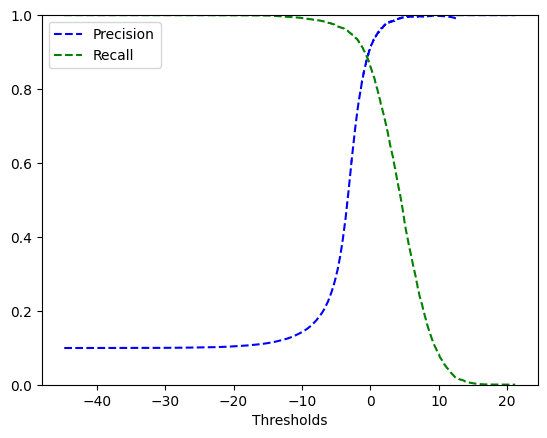

In [33]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()